In [1]:
import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import tensorflow as tf
%matplotlib inline 

In [2]:
import logging
FORMAT = '%(asctime)-15s %(levelname)s %(name)s : %(message)s'
logging.basicConfig(level=logging.DEBUG, format=FORMAT, stream=sys.stdout )
logging.debug("Logging enabled")

2018-11-07 16:40:40,115 DEBUG root : Logging enabled


In [3]:
import os
import sys
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)
HUMAN_DIR = os.path.abspath("../")
sys.path.append(HUMAN_DIR)
MODEL_DIR = os.path.abspath(os.path.join(ROOT_DIR, "../Models"))
DATA_DIR  = os.path.abspath(os.path.join(ROOT_DIR, "../Data"))
COCO_DIR  = os.path.abspath(os.path.join(DATA_DIR, "coco"))
OCCLUDE_DIR  = os.path.abspath(os.path.join(DATA_DIR, "VOCdevkit/VOC2012"))
import humans
import abstract_data
import mrcnn.model as model
import mrcnn.utils as utils

Using TensorFlow backend.


In [35]:
config = humans.HumanConfig()
logs   = os.path.join(ROOT_DIR, "logs")
model  = os.path.join(MODEL_DIR, "mask_rcnn_0004_new_maks.h5")
model = humans.load_model(mode="inference", config=config, logs=logs, model=model, model_exclude=["mrcnn_mask"])

Loading weights  /data/AI/Models/mask_rcnn_0004_new_maks.h5


In [36]:
coco_data = humans.load_data(data_type="COCO", dataset=COCO_DIR,subset="minival", occlude_data_path=OCCLUDE_DIR, max_occlusion_objects = 10, year=2014)
coco_images   = coco_data.load_images()

2018-11-07 20:51:24,867 DEBUG root : Loading data of type COCOm=, subset minival from location /data/AI/Data/coco
loading annotations into memory...
Done (t=0.75s)
creating index...
Data set type is instances
index created!
No coco data exists at /data/AI/Data/coco/annotations/panoptic_minival2014.json
2018-11-07 20:51:25,640 DEBUG root : Adding occlusions to the data
2018-11-07 20:51:25,641 DEBUG root : Loading occlusion data from /data/AI/Data/VOCdevkit/VOC2012
2018-11-07 20:51:33,050 DEBUG root : 11 Occluders loaded
2018-11-07 20:51:36,300 DEBUG root : Adding occlusion information to images
2018-11-07 20:51:36,407 DEBUG root : Added occlusion information to images


In [37]:
image_index = 5
image = coco_images.images[image_index]
image_array = image.image_data.read_image()
masks       = image.load_masks()
masks.shape

(640, 480, 1)

2018-11-07 20:51:36,554 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,584 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,614 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,630 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,673 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,689 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,717 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,735 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,748 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:51:36,779 DEBUG matplotlib.axes._base : update_title_pos


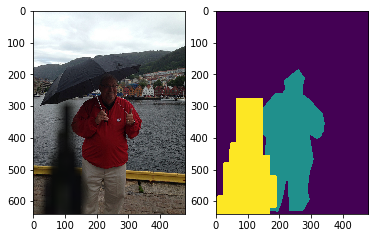

In [38]:
plt.subplot(1,2,1)
plt.imshow(image_array)
plt.subplot(1,2,2)
plt.imshow(masks[:,:,0])

In [39]:
result = model.detect([image_array])
rois, class_ids, scores, masks = [ result[0][i] for i in ["rois", "class_ids", "scores", "masks"] ]
top_scores = np.argmax(scores)

#roi, class_id, score, mask, base_mask = rois[top_scores], class_ids[top_scores], scores[top_scores], mask[:,:,:base_masks[top_score


2018-11-07 20:51:48,474 DEBUG root : mrcnn_mask.shape (100, 28, 28, 2, 3)
2018-11-07 20:51:48,476 DEBUG root : Mask is (1, 28, 28, 3), float32
2018-11-07 20:51:48,477 DEBUG root : mask.shape (28, 28, 3)
2018-11-07 20:51:48,478 DEBUG root : max(mask) 0.9662239
2018-11-07 20:51:48,479 DEBUG root : min(mask) 0.0024079438
2018-11-07 20:51:48,480 DEBUG root : Mask shape (28, 28, 3)
2018-11-07 20:51:48,481 DEBUG root : Mask shape (28, 28, 3)
2018-11-07 20:51:48,483 DEBUG root : Mask shape (435, 219, 3)
2018-11-07 20:51:48,485 DEBUG root : Mask shape (640, 480, 3)
2018-11-07 20:51:48,487 DEBUG root : max(full_mask) 0.9609375
2018-11-07 20:51:48,488 DEBUG root : min(full_mask) 0.0


In [40]:
roi, class_id, score, mask = rois[top_scores], class_ids[top_scores], scores[top_scores], masks[:,:,:,top_scores]

In [52]:
mask_im = np.zeros(mask.shape[0:3])
mask_im[:,:,0] = 1
mask_im[:,:,0] = mask[:,:,1] > 0.6
mask_im[:,:,1] = mask[:,:,2] > 0.9

2018-11-07 20:59:29,207 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,237 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,263 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,288 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,303 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,319 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,351 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,367 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,383 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,418 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,433 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,446 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,459 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 20:59:29,478 DEBUG matplotlib.axes._base : update_title_pos
2018-1

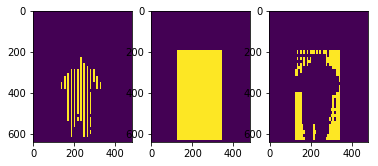

In [53]:
plt.subplot(1,3,1)
plt.imshow(mask[:,:,0] > 0.5)
plt.subplot(1,3,2)
plt.imshow(mask[:,:,1] > 0.5)
plt.subplot(1,3,3)
plt.imshow(mask[:,:,2] > 0.5)




In [50]:
np.max(mask_im)

1.0

In [51]:
np.min(mask_im)

0.0

In [54]:
mask.shape

(640, 480, 3)